In [21]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [22]:
info = json.load(open("takeoff_info.json", "r"))
tows = pd.read_csv("/home/wues_ni/Projects/ATOW-Prediction/data/challenge_set.csv")

In [23]:
cleaned = []
for day in info:
    for entry in day:
        if entry.get("info") != "OK":
            continue      
        cleaned.append(entry)

In [24]:
df = pd.json_normalize(cleaned)
df.head()

,flight_id,runway,takeoff_TAS,takeoff_groundspeed,takeoff_cumdist,runway_ft_left,runway_used,runway_percent_used,info
0,248753824,01L,151.810679,148.0,0.874165,5551.034058,5278.965942,0.487439,OK
1,248752045,05R,108.499533,105.0,0.000000,9285.060127,556.939873,0.056588,OK
2,248754253,28,134.379292,135.0,0.257865,3384.985838,4817.014162,0.587298,OK
3,248751072,25C,109.753632,108.0,0.000000,313.745470,12809.254530,0.976092,OK
4,248762582,14L,121.970957,119.0,0.170895,3229.377381,6613.622619,0.671911,OK


In [27]:
df = df.merge(tows)

<Axes: >

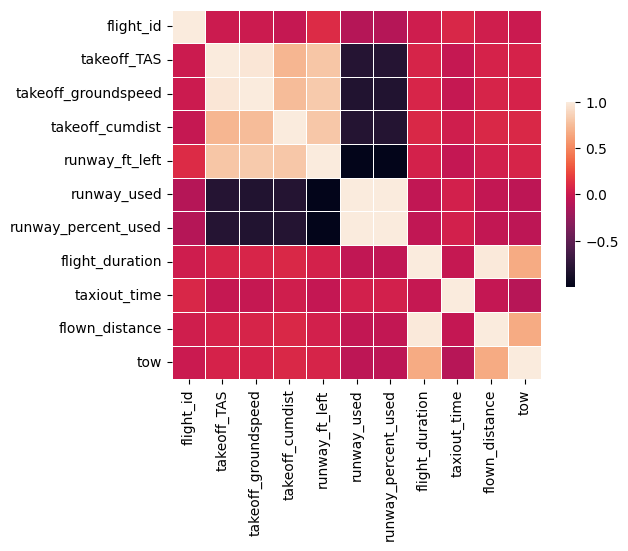

In [57]:
import seaborn as sns
data = df[(df["aircraft_type"] == "A320") & (df["runway"] == "25R")]
sns.heatmap(data.corr(numeric_only=True), square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='tow', ylabel='runway_ft_left'>

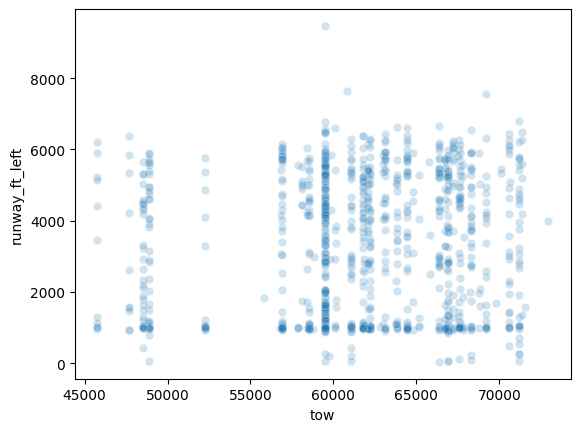

In [67]:
sns.scatterplot(data, x="tow", y="runway_ft_left", alpha=0.2)